In [1]:
import sys
sys.path.append('../')
import ipywidgets as widgets
import pandas as pd
import csv
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

In [2]:
base = "poet_results"

test_dict = {
    "mult_3d": [
        pd.read_csv(f"{base}/MULT_ENV_multiple_env_3d_1_global.csv", sep=";"),
        pd.read_csv(f"{base}/MULT_ENV_multiple_env_3d_2_global.csv", sep=";"),
        pd.read_csv(f"{base}/MULT_ENV_multiple_env_3d_3_global.csv", sep=";"),
    ],
    "mult_cppn": [
        pd.read_csv(f"{base}/MULT_ENV_multiple_env_cppn_1_global.csv", sep=";"),
        pd.read_csv(f"{base}/MULT_ENV_multiple_env_cppn_2_global.csv", sep=";"),
        pd.read_csv(f"{base}/MULT_ENV_multiple_env_cppn_3_global.csv", sep=";"),
    ],
    "poet_cppn": [
        pd.read_csv(f"{base}/POET_new_cppn_1_global.csv", sep=";"),
        pd.read_csv(f"{base}/POET_new_cppn_2_global.csv", sep=";"),
        pd.read_csv(f"{base}/POET_new_cppn_3_global.csv", sep=";"),
    ],
    "poet_3d": [
        pd.read_csv(f"{base}/POET_new_3d_1_global.csv", sep=";"),
        pd.read_csv(f"{base}/POET_new_3d_2_global.csv", sep=";"),
        pd.read_csv(f"{base}/POET_new_3d_3_global.csv", sep=";"),
    ], 
}
envs = ["env1_fit", "env2_fit", "env3_fit", "env4_fit", "env5_fit", "env6_fit"]


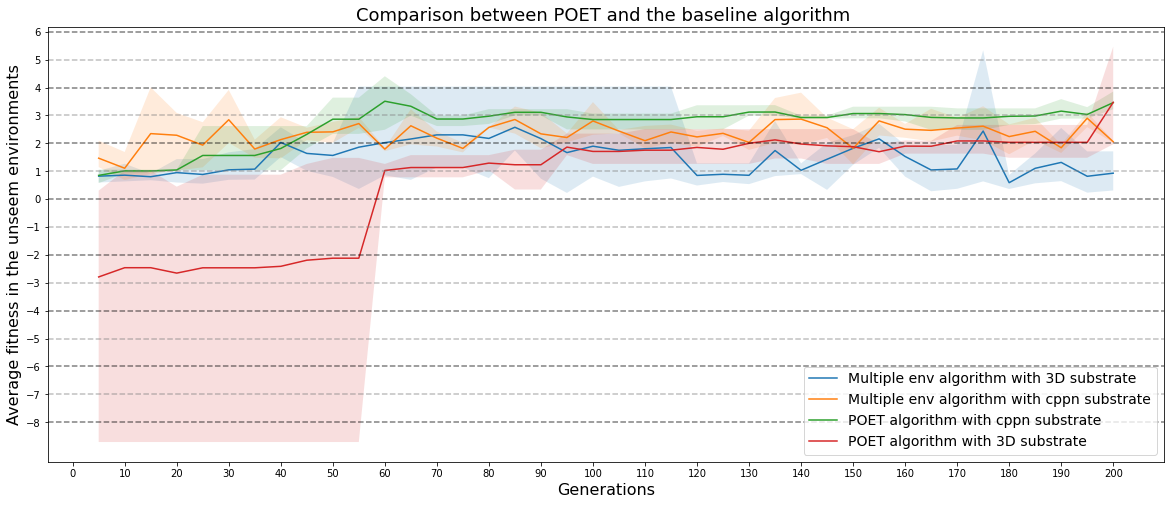

In [27]:
_ = plt.figure(figsize=(20,8))
for test_name, tests in test_dict.items():
    gens_arr =[]
    avg_arr = []
    med_arr = []
    for gen in range(5, 201, 5):
        value = []
        for pop in tests:
            fits = []
            gen_pop = pop[pop["gen"] == gen]
            for idx in gen_pop.index:
                fit_per_pop = []
                for e in envs:
                    fit_per_pop.append(gen_pop[e][idx])
                fits.append(fit_per_pop)

            best = [-10000]
            for arr in fits:
                if np.mean(arr) > np.mean(best):
                    best = arr
            value.append(best)
        gens_arr.append(gen)
        avg_arr.append([np.average(x) for x in value])
        med_arr.append([np.median(x) for x in value])

    wanted_arr = avg_arr
    results = [np.average(x) for x in wanted_arr]
    min_arr = [min(x) for x in wanted_arr]
    max_arr = [max(x) for x in wanted_arr]
    if test_name == "mult_3d":
        l = "Multiple env algorithm with 3D substrate"
    if test_name == "mult_cppn":
        l = "Multiple env algorithm with cppn substrate"
        
    if test_name == "poet_3d":
        l = "POET algorithm with 3D substrate"
    if test_name == "poet_cppn":
        l = "POET algorithm with cppn substrate"
    plt.plot(gens_arr, results, lw =1.5, label=l)
    plt.fill_between(gens_arr, min_arr,max_arr, alpha = 0.15)
    # plt.plot(gens_arr, med_arr, lw =1.5, label=t + "_Median")

plt.xlabel("Generations", fontsize=16)
plt.xticks(np.arange(0, 202, 10))
plt.yticks(np.arange(-8, 7, 1))
for i in range(-8, 7, 1):
    c = "gray"
    if i%2==0:
        c = "black"
    plt.axhline(y = i, color = c, linestyle = '--', alpha = 0.5)


plt.ylabel("Average fitness in the unseem environments", fontsize=16)
_ = plt.legend(loc="lower right", fontsize=14)
plt.title('Comparison between POET and the baseline algorithm ', fontsize = 18)
plt.show()

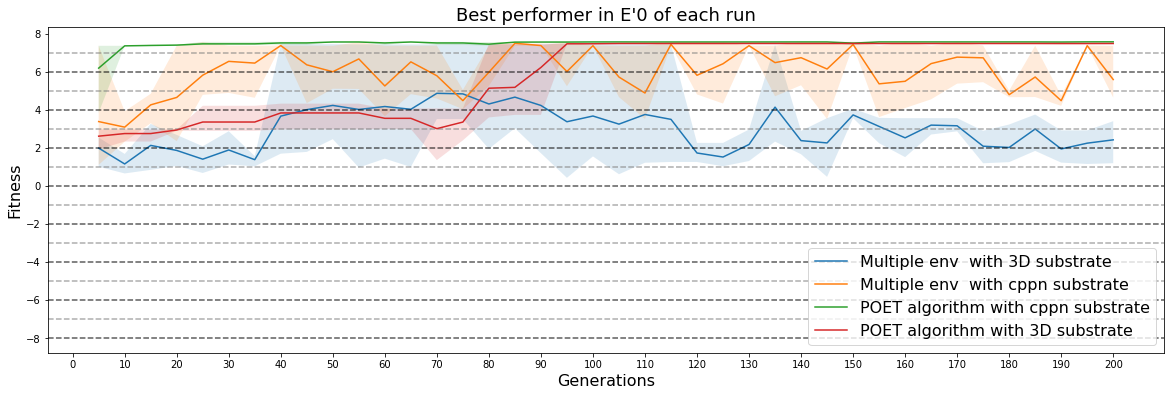

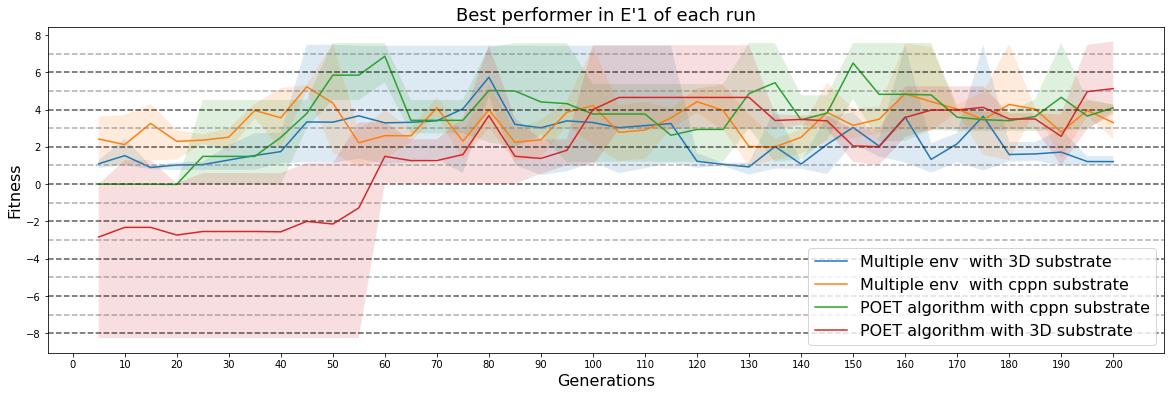

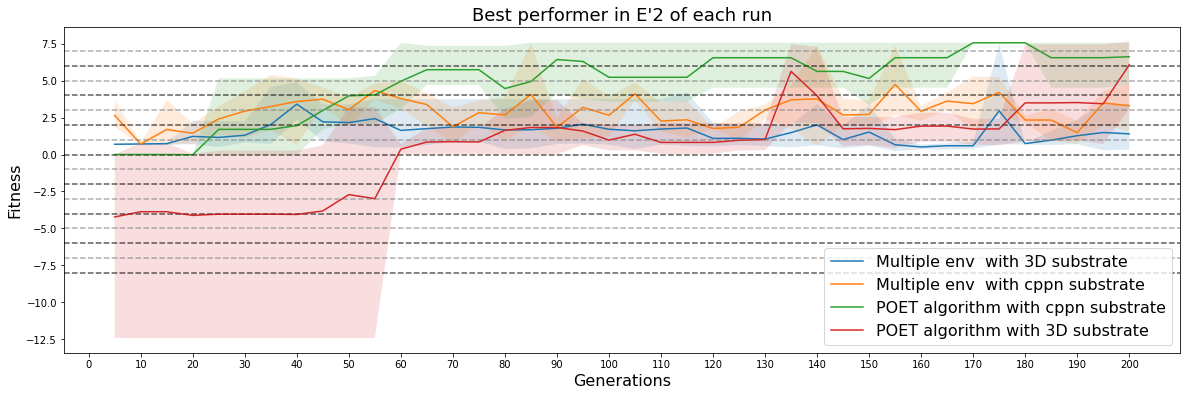

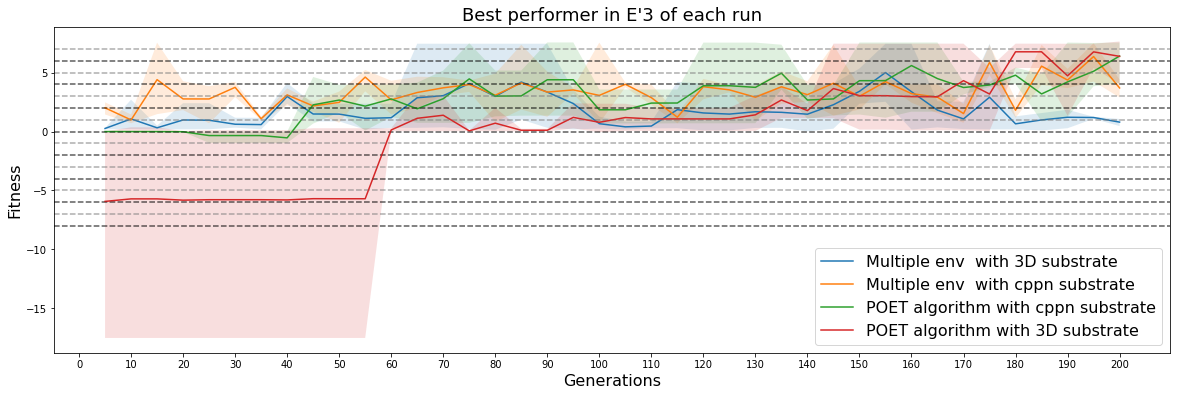

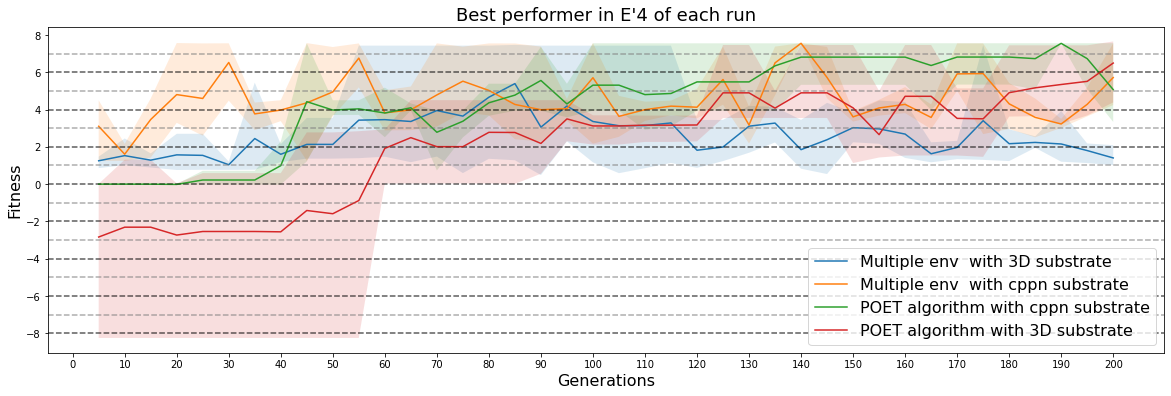

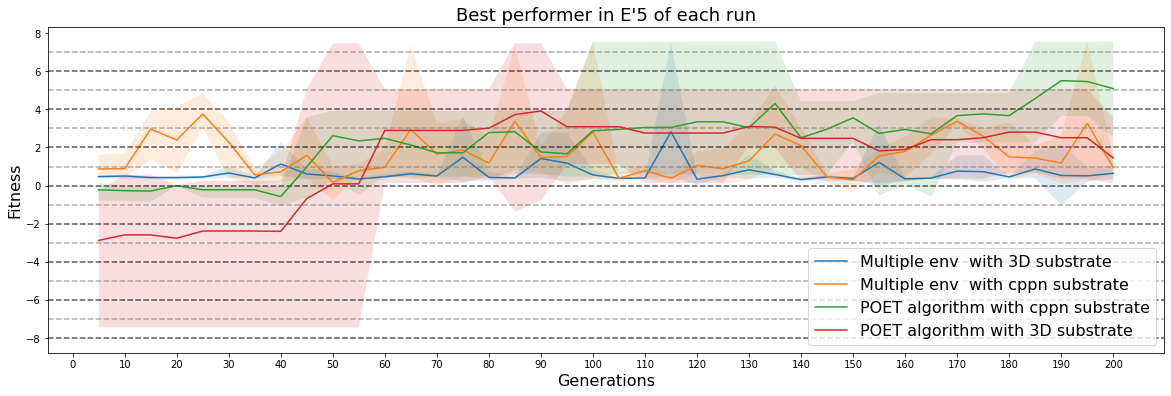

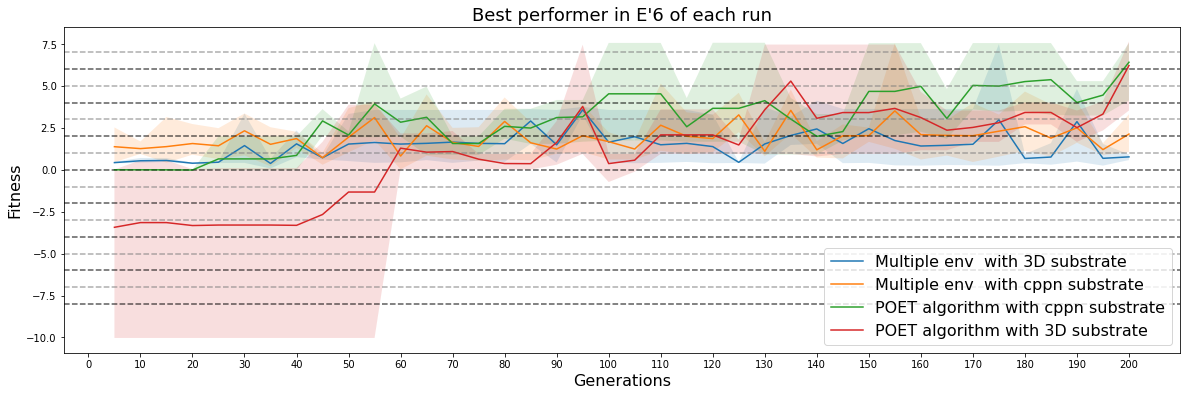

In [37]:
envs = ["env0_fit", "env1_fit", "env2_fit", "env3_fit", "env4_fit", "env5_fit", "env6_fit"]
cont = 0
for e in envs:

    _ = plt.figure(figsize=(20,6))
    for test_name, tests in test_dict.items():
        gens_arr =[]
        
        avg_arr = []
        med_arr = []
        max_arr = []
        for gen in range(5, 201, 5):
            value = []
            for pop in tests:
                fits = []
                gen_pop = pop[pop["gen"] == gen]
                for idx in gen_pop.index:
                    fits.append(gen_pop[e][idx])
                value.append(fits)
            gens_arr.append(gen)
            max_arr.append([max(x) for x in value])
        
        results = [np.average(x) for x in max_arr]
        min_fill_arr = [min(x) for x in max_arr]
        max_fill_arr = [max(x) for x in max_arr]


        if test_name == "mult_3d":
            l = "Multiple env  with 3D substrate"
        if test_name == "mult_cppn":
            l = "Multiple env  with cppn substrate"

        if test_name == "poet_3d":
            l = "POET algorithm with 3D substrate"
        if test_name == "poet_cppn":
            l = "POET algorithm with cppn substrate"
        
        plt.plot(gens_arr, results, lw =1.5, label=l)
        plt.xlabel("Generations", fontsize=16)
        plt.xticks(np.arange(0, 202, 10))
        plt.ylabel("Fitness", fontsize=16)
        plt.fill_between(gens_arr, min_fill_arr, max_fill_arr, alpha = 0.15)
        # plt.yticks(np.arange(-8, 8, 1))
        for i in range(-8, 8, 1):
            c = "gray"
            if i%2==0:
                c = "black"
            plt.axhline(y = i, color = c, linestyle = '--', alpha = 0.2)

                
    title = f"Best performer in E'{cont} of each run"
    plt.title(title, fontsize = 18)
    _ = plt.legend(loc="lower right", fontsize=16)
    save_as = title.replace(" ", "_")
    plt.savefig(f"{save_as}.png")
    cont += 1
    